<a href="https://colab.research.google.com/github/RamDorak/AttendanceWeb/blob/main/GeminiTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Install
!pip install --upgrade google-cloud-aiplatform
from google.cloud import aiplatform
import vertexai.preview

#Authenticate
from google.colab import auth
auth.authenticate_user()

#Restart Kernel
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

In [3]:
#Set PROJECT_ID and REGION variables
import vertexai.preview
import vertexai
PROJECT_ID = "ageless-courier-409506"  # your project id
REGION = "us-central1"

vertexai.init(project=PROJECT_ID, location=REGION)

In [4]:
from vertexai.language_models import TextEmbeddingModel
from vertexai.preview.generative_models import GenerativeModel, Image
vision_model = GenerativeModel("gemini-pro-vision")

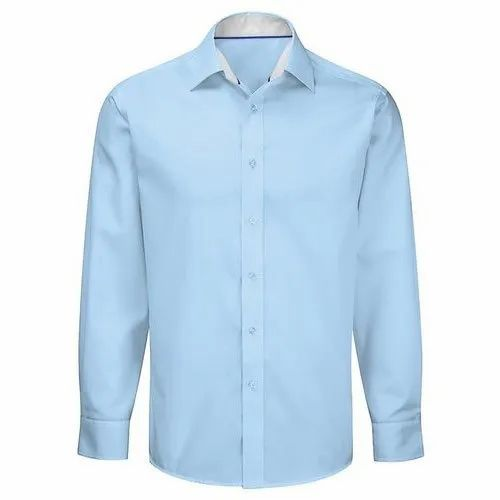

In [5]:
!curl -o image.jpg --silent --show-error https://5.imimg.com/data5/VH/BL/PA/SELLER-96763193/fond-of-mens-cotton-shirts-500x500.jpg
image = Image.load_from_file("image.jpg")
image

In [6]:
vision_model.generate_content([image, "Royal Challengers Bangalore T shirt"])

candidates {
  content {
    role: "model"
    parts {
      text: " The Royal Challengers Bangalore (RCB) is a franchise cricket team based in Bangalore, Karnataka, India. They play in the Indian Premier League (IPL). The team was founded in 2008 and is owned by Royal Challengers Sports Private Limited. The team\'s home ground is the M. Chinnaswamy Stadium.\n\nThe RCB have won the IPL title once, in 2011. They have also been runners-up three times, in 2009, 2010 and 2016. The team is captained by Virat Kohli and coached by Mike Hesson.\n\nThe RCB have a number of star players, including Virat Kohli, AB de Villiers, Yuzvendra Chahal and Dale Steyn. The team is known for its aggressive batting style and has scored the most runs in the IPL.\n\nThe RCB are one of the most popular teams in the IPL and have a large fan base. The team\'s matches are often sell-outs and the team has a strong social media presence.\n\nThe RCB are a successful and popular team in the IPL. They have a strong tea

In [7]:
vision_model = GenerativeModel("gemini-pro-vision")
response = vision_model.generate_content([image, "Royal Challengers Banglore T shirt"])
response.text

" Royal Challengers Banglore is a cricket team that plays in the Indian Premier League. The team is based in Bangalore, Karnataka. The team was founded in 2008 and is owned by Royal Challengers Sports Private Limited. The team's home ground is the M. Chinnaswamy Stadium. The team is captained by Virat Kohli and coached by Mike Hesson. The team's colors are red and black."

In [8]:
!curl -o image1.jpg --silent --show-error https://storage.googleapis.com/img_public_test/data%20files/Apparel/orange_shorts1.JPG
image1 = Image.load_from_file("image1.jpg")

!curl -o image2.jpg --silent --show-error https://storage.googleapis.com/img_public_test/data%20files/Apparel/white_shorts1.JPG
image2 = Image.load_from_file("image2.jpg")

In [ ]:
#Generate description for the image in structured format with color, size and category

prompt = [
    "Describe the following image in terms of color, size - whether it is small, medium or large, type of apparel - whether shirt or trousers or half pants etc. and what category of people it suits - whether kids or adult men or women? Do not include any brand names.",
    image,
    "Also for the generated description, can you select the most suitable matching apparel from the following images",
    image1,
    image2,
    "and provide the justification for it"
]

response = vision_model.generate_content(prompt)

response.text